In [1]:
#loading in relevant packages
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import folium   
import seaborn as sns 

# Question 3(1)

**For each chosen indicator:
If applicable, visualize any spatial data the indicator is based on. (For example, the locations of certain POIs.)**

In [2]:
#Loading in data for age
age = pd.read_csv(r"Data\ACSST5Y2019.S0101\ACSST5Y2019.S0101\ACSST5Y2019.S0101_data_with_overlays.csv",skiprows=[1])

In [3]:
#Looking at the first 5 rows of data from the age file to make sure that it was loaded in correctly. 
age.head()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,8600000US01001,ZCTA5 01001,17312,735,956,233,863,222,967,274,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,8600000US01002,ZCTA5 01002,30014,485,872,143,1043,192,1123,215,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,8600000US01003,ZCTA5 01003,11357,477,0,19,0,19,0,19,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,8600000US01005,ZCTA5 01005,5128,404,127,72,199,139,408,153,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,8600000US01007,ZCTA5 01007,15005,20,879,183,828,186,969,193,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [4]:
#Checking the number of null values in this dataset
age.isnull()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
534,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#Renaming columns to make them more understandable
age.rename(columns = {'S0101_C01_015E' : '65-69 Years', 'S0101_C01_001E': 'Total Population', 'S0101_C01_016E': '70-74 Years', 'S0101_C01_017E': '75-79 Years', 'S0101_C01_018E': '80-84 Years', 'S0101_C01_019E' : '85 Years and Older', 'NAME':'ZCTA'}, inplace = True)

#Removing ZCTA5 from column values so they will match when they merge to zipcodes gpd
age['ZCTA'] = age['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

#Choosing the columns that are going to be analysed
age = age[['ZCTA', 'Total Population', '65-69 Years', '70-74 Years', '75-79 Years',  '80-84 Years', '85 Years and Older' ]]
age.head()

,ZCTA,Total Population,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85 Years and Older
0,01001,17312,1016,1057,786,435,768
1,01002,30014,1172,1219,599,441,580
2,01003,11357,4,0,0,0,0
3,01005,5128,375,167,68,81,102
4,01007,15005,880,489,423,310,119


In [6]:
#Looking at age's file type
print(type(age))

<class 'pandas.core.frame.DataFrame'>


In [7]:
#Checking the datatypes contained within age
age.dtypes

ZCTA                  object
Total Population       int64
65-69 Years            int64
70-74 Years            int64
75-79 Years            int64
80-84 Years            int64
85 Years and Older     int64
dtype: object

In [8]:
#Adding values in columns for age to create a new seniors column 
age['seniors'] = age['65-69 Years'] + age['70-74 Years'] + age['75-79 Years'] + age['80-84 Years'] + age['85 Years and Older']

In [9]:
#Checking the unique values contained in age
age['seniors'].unique()

array([ 4062,  4011,     4,   793,  2221,   285,    35,   736,   278,
         148,  3342,  6276,   556,   228,  3382,  3528,   104,  2070,
         206,    84,  1183,   421,  1261,  1289,   128,   646,   248,
        5698,   425,   446,   518,  3977,  1650,  2526,  2154,     0,
          31,   303,  1612,   190,   223,   277,  1197,    25,  3422,
        2108,   266,   314,  2164,   386,    54,  7293,    47,  4560,
         136,    93,   163,  3153,   528,     3,   315,   250,  3390,
        1342,  3306,  1141,  2808,  3134,  2330,  2067,   636,  1251,
        1021,  9083,  1592,   176,   580,   690,  1466,    39,  2137,
         524,   280,   633,  1507,  1860,    65,    67,    57,  3010,
         281,   331,   231,   141,   621,   108,   184,    69,   398,
        1543,   170,  3740,   316,  2249,   550,    34,   390,   450,
         459,   238,    12,   267,   151,    28,   208,    18,   312,
         219,   591,  1417,   302,   137,   311,   963,   572,  1111,
         156,  5487,

In [10]:
#Ensuring that all the values that are supposed to be in age are there
age.shape[0]

537

In [11]:
#Dividing age by total population to get the percentages of seniors in each zipcode. Storing the data in a new column in the age dataset.
age['percent_seniors'] =  age.seniors / age['Total Population']


In [12]:
#Looking at the results that are located in the new column to ensure that they look okay. 
age['percent_seniors']

0      0.234635
1      0.133638
2      0.000352
3      0.154641
4      0.148017
         ...   
532    0.200821
533    0.140267
534    0.153079
535    0.242956
536    0.537313
Name: percent_seniors, Length: 537, dtype: float64

In [13]:
#Loading in csv data (whether residents were born in the United States)
foreign = pd.read_csv(r"Data\ACSST5Y2019.S0501_2021-05-12T161803\ACSST5Y2019.S0501_data_with_overlays_2021-05-12T161735.csv", skiprows=[1])

C:\Users\caree\miniconda3\envs\uep239\lib\site-packages\IPython\core\interactiveshell.py:3050: DtypeWarning: Columns (3,504,505,738,739,742,743,778,779,1012,1013,1016,1017,1040,1041,1046,1047,1052,1053,1060,1061,1282,1283,1286,1287,1290,1291,1294,1295,1320,1321,1326,1327) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
#Checking the number of null values in this dataset
foreign.isnull()

,GEO_ID,NAME,S0501_C01_001E,S0501_C01_001M,S0501_C01_002E,S0501_C01_002M,S0501_C01_003E,S0501_C01_003M,S0501_C01_004E,S0501_C01_004M,...,S0501_C05_133E,S0501_C05_133M,S0501_C05_134E,S0501_C05_134M,S0501_C05_135E,S0501_C05_135M,S0501_C05_136E,S0501_C05_136M,S0501_C05_137E,S0501_C05_137M
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
534,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
535,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
536,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [15]:
#Replacing null values with zero so that they don't interfere with calculations later on 
foreign = foreign.fillna(0) 

In [16]:
#Looking at the first five values in the dataset
foreign.head()

,GEO_ID,NAME,S0501_C01_001E,S0501_C01_001M,S0501_C01_002E,S0501_C01_002M,S0501_C01_003E,S0501_C01_003M,S0501_C01_004E,S0501_C01_004M,...,S0501_C05_133E,S0501_C05_133M,S0501_C05_134E,S0501_C05_134M,S0501_C05_135E,S0501_C05_135M,S0501_C05_136E,S0501_C05_136M,S0501_C05_137E,S0501_C05_137M
0,8600000US01001,ZCTA5 01001,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8600000US01002,ZCTA5 01002,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8600000US01003,ZCTA5 01003,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8600000US01005,ZCTA5 01005,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8600000US01007,ZCTA5 01007,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Renaming columns to make them more understandable
foreign.rename(columns = {'S0501_C03_001E' : 'Foreign-Born Total Pop', 'S0501_C01_001E': 'Total Population', 'NAME':'ZCTA'}, inplace = True)

#Removing ZCTA5 from column values so they will match when they merge
foreign['ZCTA'] = foreign['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

#Choosing the columns that are going to be analysed
foreign = foreign[['ZCTA', 'Total Population','Foreign-Born Total Pop']]

#Re-checking the first five values in the dataset to ensure that changes were applied
foreign.head()


,ZCTA,Total Population,Foreign-Born Total Pop
0,01001,0.0,0.0
1,01002,0.0,0.0
2,01003,0.0,0.0
3,01005,0.0,0.0
4,01007,0.0,0.0


In [18]:
#checking the 
foreign.dtypes

ZCTA                       object
Total Population          float64
Foreign-Born Total Pop    float64
dtype: object

In [19]:
#foreign.astype({'Total Population':int, 'Foreign-Born Total Pop':int}).dtypes

In [20]:
#Dividing age by total population and storing the values in a new column
foreign['percent_foreign'] = foreign['Foreign-Born Total Pop'] / foreign['Total Population']

In [21]:
#Looking at the newly created column
foreign['percent_foreign']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
533        NaN
534        NaN
535        NaN
536        NaN
537    0.16771
Name: percent_foreign, Length: 538, dtype: float64

In [22]:
#Checking the unique values in this dataset
foreign['percent_foreign'].unique()

array([       nan, 0.23785256, 0.24529339, 0.36272268, 0.27569458,
       0.20213583, 0.43352847, 0.33109351, 0.22302216, 0.3663234 ,
       0.24628504, 0.24812524, 0.40369856, 0.37819365, 0.15472752,
       0.26050537, 0.25634481, 0.34261746, 0.37565857, 0.2879486 ,
       0.38330416, 0.34199865, 0.47447263, 0.21441017, 0.28275081,
       0.36730798, 0.26720206, 0.32598756, 0.24444214, 0.29662921,
       0.35236955, 0.42642332, 0.43078624, 0.45354276, 0.38982514,
       0.21670712, 0.29989562, 0.37162435, 0.35406812, 0.21930752,
       0.35319726, 0.30429978, 0.29367904, 0.21555268, 0.16514015,
       0.1677104 ])

In [23]:
#Loading in csv data(households that speak limited english)
limited_eng = pd.read_csv(r"Data\ACSST5Y2019.S1602_2021-05-12T065118\ACSST5Y2019.S1602_data_with_overlays_2021-05-12T065115.csv",skiprows=[1])

In [24]:
#Looking at the first 5 rows in the dataset
limited_eng.head()

,GEO_ID,NAME,S1602_C01_001E,S1602_C01_001M,S1602_C01_002E,S1602_C01_002M,S1602_C01_003E,S1602_C01_003M,S1602_C01_004E,S1602_C01_004M,...,S1602_C04_001E,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M
0,8600000US01001,ZCTA5 01001,7413,322,200,105,866,216,155,89,...,2.4,1.5,22.0,19.2,10.9,9.4,25.8,30.2,0.0,40.1
1,8600000US01002,ZCTA5 01002,9798,451,390,118,962,228,710,189,...,2.7,1.1,10.8,9.4,5.0,5.4,23.2,10.8,3.8,7.5
2,8600000US01003,ZCTA5 01003,42,42,0,19,4,7,14,20,...,0.0,47.5,-,**,0.0,100.0,0.0,82.3,-,**
3,8600000US01005,ZCTA5 01005,1944,232,19,30,47,47,25,42,...,0.0,1.8,0.0,70.6,0.0,44.9,0.0,61.6,-,**
4,8600000US01007,ZCTA5 01007,5563,196,103,66,279,114,181,110,...,1.9,1.7,15.5,25.7,6.5,10.0,38.1,34.8,-,**


In [25]:
#Renaming columns to make them more understandable
limited_eng.rename(columns = {'S1602_C01_001E' : 'Total Households', 'S1602_C03_001E': 'Limited English-Speaking', 'NAME':'ZCTA'}, inplace = True)

#Removing ZCTA5 from column values so they will match when they merge
limited_eng['ZCTA'] = limited_eng['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

#Choosing the columns that are going to be analysed
limited_eng = limited_eng[['ZCTA', 'Total Households','Limited English-Speaking']]

#Looking at the first five rows in the dataset
limited_eng.head()

,ZCTA,Total Households,Limited English-Speaking
0,01001,7413,178
1,01002,9798,266
2,01003,42,0
3,01005,1944,0
4,01007,5563,103


In [26]:
#Checking the type of dataset
print(type(limited_eng))

<class 'pandas.core.frame.DataFrame'>


In [27]:
#Checking the types of data that are located in the dataset
limited_eng.dtypes

ZCTA                        object
Total Households             int64
Limited English-Speaking     int64
dtype: object

In [28]:
#Dividing limited english-speaking column by total households column and storing the values in a new column
limited_eng['percent_limited'] = limited_eng['Limited English-Speaking'] / limited_eng['Total Households']

In [29]:
#Looking at the values in the new column
limited_eng['percent_limited']

0      0.024012
1      0.027148
2      0.000000
3      0.000000
4      0.018515
         ...   
533    0.007131
534    0.063084
535    0.015185
536    0.000000
537    0.058394
Name: percent_limited, Length: 538, dtype: float64

In [30]:
#Loading in csv data (financial charachteristics of population)
financial = pd.read_csv(r"Data\ACSST5Y2019.S2503\ACSST5Y2019.S2503\ACSST5Y2019.S2503_data_with_overlays.csv",skiprows=[1])

In [31]:
#Looking at the first 5 rows in the dataset
financial.head()

,GEO_ID,NAME,S2503_C01_001E,S2503_C01_001M,S2503_C01_002E,S2503_C01_002M,S2503_C01_003E,S2503_C01_003M,S2503_C01_004E,S2503_C01_004M,...,S2503_C06_042E,S2503_C06_042M,S2503_C06_043E,S2503_C06_043M,S2503_C06_044E,S2503_C06_044M,S2503_C06_045E,S2503_C06_045M,S2503_C06_046E,S2503_C06_046M
0,8600000US01001,ZCTA5 01001,7413,322,230,138,163,105,320,113,...,15.6,6.9,1.6,1.8,0.0,1.7,2.1,1.7,7.9,3.5
1,8600000US01002,ZCTA5 01002,9798,451,562,198,376,130,465,212,...,9.3,3.0,10.7,3.7,2.6,2.2,6.3,3.2,1.1,0.9
2,8600000US01003,ZCTA5 01003,42,42,24,38,0,19,14,20,...,0.0,49.9,0.0,49.9,0.0,49.9,63.2,53.3,0.0,49.9
3,8600000US01005,ZCTA5 01005,1944,232,51,50,27,44,34,50,...,28.1,29.3,0.0,12.1,0.0,12.1,0.0,12.1,17.4,18.0
4,8600000US01007,ZCTA5 01007,5563,196,81,65,109,107,105,90,...,14.1,7.1,13.5,11.0,0.0,3.3,0.0,3.3,4.6,5.2


In [32]:
#Renaming columns to make them more understandable
#Used $34,999 as the highest range because, in the US, poverty threshold for a family of 4 is 26,200
financial.rename(columns = {'S2503_C01_001E' : 'Total Occupied Units', 'S2503_C01_007E': '$25,000-$34,999','S2503_C01_006E': '$20,000-$24,999', 'S2503_C01_005E': '$15,000-$19,999', 'S2503_C01_004E': '$10,000-$14,999','S2503_C01_003E': '$5,000-$9,999','S2503_C01_002E': 'Less Than $5,000', 'NAME':'ZCTA'}, inplace = True)

#Removing ZCTA5 from column values so it will match when they merge
financial['ZCTA'] = financial['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

#Choosing the columns that are going to be analysed
financial = financial[['ZCTA', 'Total Occupied Units','$25,000-$34,999','$20,000-$24,999','$15,000-$19,999', '$10,000-$14,999', '$5,000-$9,999','Less Than $5,000']]

#Checking the first 5 rows in the dataset
financial.head()

,ZCTA,Total Occupied Units,"$25,000-$34,999","$20,000-$24,999","$15,000-$19,999","$10,000-$14,999","$5,000-$9,999","Less Than $5,000"
0,01001,7413,503,342,238,320,163,230
1,01002,9798,905,322,423,465,376,562
2,01003,42,0,0,0,14,0,24
3,01005,1944,52,91,17,34,27,51
4,01007,5563,443,65,124,105,109,81


In [33]:
#Checking the type of dataset
print(type(financial))

<class 'pandas.core.frame.DataFrame'>


In [34]:
#Looking at the data types in the financial dataset 
financial.dtypes

ZCTA                    object
Total Occupied Units     int64
$25,000-$34,999          int64
$20,000-$24,999          int64
$15,000-$19,999          int64
$10,000-$14,999          int64
$5,000-$9,999            int64
Less Than $5,000         int64
dtype: object

In [35]:
#Adding up the financial columns to create a new column
financial['low-income'] = financial['$25,000-$34,999'] + financial['$20,000-$24,999'] + financial['$15,000-$19,999'] + financial['$10,000-$14,999'] + financial['Less Than $5,000']

In [36]:
#Dividing low-income column by total occupied units column 
financial['percent_low-income'] =  financial['low-income'] / financial['Total Occupied Units']

In [37]:
#Looking at the newly created column 
financial['percent_low-income']

0      0.220289
1      0.273219
2      0.904762
3      0.126029
4      0.147043
         ...   
532    0.176387
533    0.074245
534    0.280060
535    0.211021
536    0.145299
Name: percent_low-income, Length: 537, dtype: float64

In [38]:
import geopandas as gpd

In [39]:
#Loading in the zcta shapefile as geopandas
zcta = gpd.read_file(r"Data\tl_2010_25_zcta510\tl_2010_25_zcta510\tl_2010_25_zcta510.shp")

In [40]:
#Checking the type of dataset
type(zcta)

geopandas.geodataframe.GeoDataFrame

In [41]:
#Changing the crs of zcta
zcta = zcta.to_crs('epsg:6491')

In [42]:
#Checking the crs of zcta
zcta.crs

<Projected CRS: EPSG:6491>
Name: NAD83(2011) / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [43]:
#Looking at the columns located in zcta
zcta.columns

Index(['STATEFP10', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry'],
      dtype='object')

<AxesSubplot:>

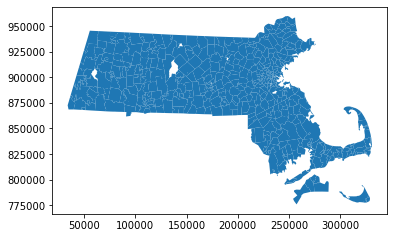

In [44]:
#plotting zcta on a map
zcta.plot()

In [45]:
from rasterio import features 
from rasterio.plot import show
from affine import Affine
import math
from scipy import ndimage
from rasterstats import zonal_stats


In [46]:
#Reading in shapefiles as geopandas
hospitals = gpd.read_file(r'Data\HOSPITALS_PT\HOSPITALS_PT\HOSPITALS_PT.shp')

In [47]:
#Checking the crs
hospitals.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
#Changing the crs
hospitals = hospitals.to_crs('epsg:6491')

In [49]:
#Checking the crs
hospitals.crs

<Projected CRS: EPSG:6491>
Name: NAD83(2011) / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

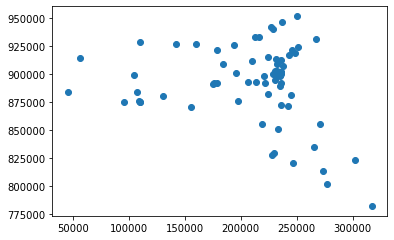

In [50]:
#Plotting hospitals
hospitals.plot()

In [51]:
#Steps taken to create a new raster
minx, miny, maxx, maxy = zcta.geometry.total_bounds.round()

In [52]:
zcta_cell = 50

In [53]:
n_rows = math.ceil((maxy-miny) / zcta_cell)
n_rows

3680

In [54]:
n_col = math.ceil((maxx-minx) / zcta_cell)
n_col

5946

In [55]:
#Creating a shape
ras_shape = (n_rows, n_col)

In [56]:
#Creating a transform
ras_trans = Affine.from_gdal(minx,zcta_cell,0,maxy,0,-zcta_cell)

In [57]:
#Cgecking the transform
ras_trans

Affine(50.0, 0.0, 33870.0,
       0.0, -50.0, 959743.0)

In [58]:
zcta.geometry.total_bounds

array([ 33869.69553478, 775778.96778491, 331168.3403439 , 959743.22658563])

In [59]:
zcta.geometry.total_bounds.round()

array([ 33870., 775779., 331168., 959743.])

In [60]:
#Storing the new raster in a variable
hospital_raster = features.rasterize(hospitals['geometry'], fill=1, default_value=0,out_shape= ras_shape,transform=ras_trans)

In [61]:
nearest_hospital = ndimage.distance_transform_edt(hospital_raster)*zcta_cell

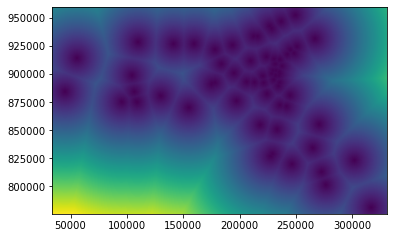

<AxesSubplot:>

In [62]:
#visualising the new raster
show(nearest_hospital,transform=ras_trans)

In [63]:
#Masking the nearest_hospital raster
import numpy as np
nearest_reclass = np.full(ras_shape, np.NaN)

In [64]:
#Performing zonal stats to calculate the average euclidean distances of hospitals in each zipcode
zs_hosp = zonal_stats(zcta, nearest_hospital, affine=ras_trans, stats='mean', nodata=-999)

In [65]:
mean_score = [i['mean'] for i in zs_hosp]

In [66]:
#mean_score

In [67]:
#Adding average risk to zcta geodataframe
zcta['Euclidean Distances'] = mean_score


<AxesSubplot:>

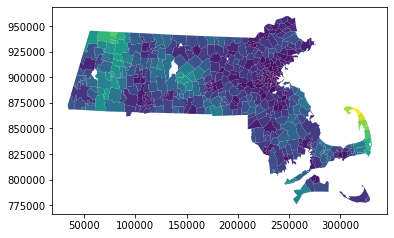

In [68]:
#Creating a choropleth map
zcta.plot(column = 'Euclidean Distances')


In [69]:
#Looking at the first 15 rows of zcta
zcta.head(15)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,Euclidean Distances
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((275712.154 812608.480, 275688.314 81...",6622.255092
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((273020.046 818874.990, 272816.173 81...",8407.182952
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((273020.046 818874.990, 273126.263 81...",2755.576382
3,25,02646,2502646,B5,G6350,S,7798581,801405,+41.6705961,-070.0714493,N,"POLYGON ((318297.748 826255.912, 318348.040 82...",16850.560343
4,25,01237,2501237,B5,G6350,S,160121626,1140685,+42.5478177,-073.2680327,N,"POLYGON ((57335.091 917317.398, 57310.861 9173...",11240.588630
5,25,01259,2501259,B5,G6350,S,65593267,2042077,+42.0754693,-073.2343765,N,"POLYGON ((53481.228 874966.239, 53478.406 8749...",17263.239054
6,25,01242,2501242,B5,G6350,S,1288423,24934,+42.3337341,-073.2491986,N,"POLYGON ((55800.914 898874.380, 55640.107 8988...",14046.692866
7,25,01253,2501253,B5,G6350,S,47310437,1044523,+42.2066825,-073.1132135,N,"MULTIPOLYGON (((68945.234 882706.182, 68915.88...",21411.686795
8,25,01264,2501264,B5,G6350,S,29425420,90081,+42.2315896,-073.2024283,N,"POLYGON ((62844.748 887987.089, 62792.043 8860...",15177.743012
9,25,01270,2501270,B5,G6350,S,82512104,420829,+42.5152719,-073.0311664,N,"POLYGON ((68819.092 916129.201, 68807.033 9161...",18409.246548


In [70]:
#Reclassifying zcta
zcta['hosp_reclass'] = 0
zcta.loc[zcta['Euclidean Distances'] >= 25000,'hosp_reclass'] = 5
zcta.loc[(zcta['Euclidean Distances'] >= 20000) & (zcta['Euclidean Distances'] <= 24999), 'hosp_reclass'] = 4
zcta.loc[(zcta['Euclidean Distances'] >= 15000) & (zcta['Euclidean Distances'] <= 19999), 'hosp_reclass'] = 3
zcta.loc[(zcta['Euclidean Distances'] >= 10000) & (zcta['Euclidean Distances'] <= 14999), 'hosp_reclass'] = 2
zcta.loc[zcta['Euclidean Distances'] <= 5000,'hosp_reclass'] = 1



In [71]:
#Checking first logic step
zcta['hosp_reclass'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [72]:
#Checking to see max values (for logic)
zcta['Euclidean Distances'].max()

45410.68856212867

<AxesSubplot:>

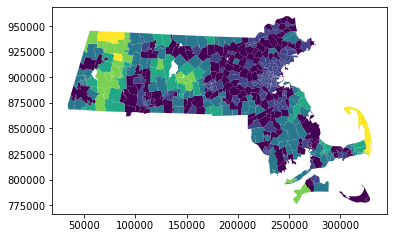

In [73]:
#Plotting the reclassification
zcta.plot(column = 'hosp_reclass')


In [74]:
zcta.hosp_reclass.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [75]:
#Used to strip the white spaces from in front of values in columns
#financial.ZCTA = financial.ZCTA.str.lstrip()

#Ensuring that financial and zcta can be merged 
print(zcta.ZCTA5CE10.unique()[:10])
print(financial.ZCTA.unique()[:10])


['02536' '02556' '02540' '02646' '01237' '01259' '01242' '01253' '01264'
 '01270']
['01001' '01002' '01003' '01005' '01007' '01008' '01009' '01010' '01011'
 '01012']


In [76]:
#Looking at the columns in financial
financial.columns

Index(['ZCTA', 'Total Occupied Units', '$25,000-$34,999', '$20,000-$24,999',
       '$15,000-$19,999', '$10,000-$14,999', '$5,000-$9,999',
       'Less Than $5,000', 'low-income', 'percent_low-income'],
      dtype='object')

In [77]:
#Merging financial on to zcta
zcta = zcta.merge(financial,left_on='ZCTA5CE10', right_on='ZCTA')

<AxesSubplot:>

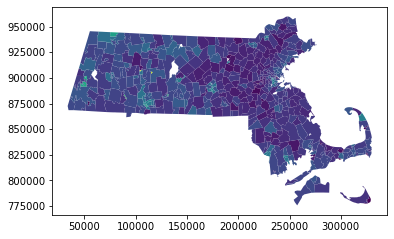

In [78]:
#Plotting financial column
zcta.plot('percent_low-income')

In [79]:
# Checking that zcta and age can be merged 
print(zcta.ZCTA5CE10.unique()[:10])
print(age.ZCTA.unique()[:10])

['02536' '02556' '02540' '02646' '01237' '01259' '01242' '01253' '01264'
 '01270']
['01001' '01002' '01003' '01005' '01007' '01008' '01009' '01010' '01011'
 '01012']


In [80]:
#Merging age and zcta
zcta = zcta.merge(age,left_on='ZCTA5CE10', right_on='ZCTA')

In [81]:
#Looking at the columns in zcta to ensure that age was merged
zcta.columns

Index(['STATEFP10', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry', 'Euclidean Distances', 'hosp_reclass',
       'ZCTA_x', 'Total Occupied Units', '$25,000-$34,999', '$20,000-$24,999',
       '$15,000-$19,999', '$10,000-$14,999', '$5,000-$9,999',
       'Less Than $5,000', 'low-income', 'percent_low-income', 'ZCTA_y',
       'Total Population', '65-69 Years', '70-74 Years', '75-79 Years',
       '80-84 Years', '85 Years and Older', 'seniors', 'percent_seniors'],
      dtype='object')

<AxesSubplot:>

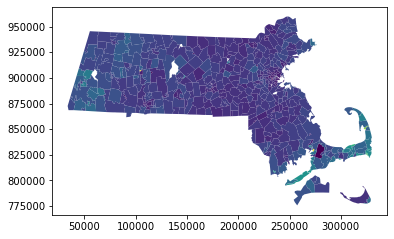

In [82]:
#Plotting age column 
zcta.plot('percent_seniors')

In [83]:
#Checking to ensure zcta and limited_eng can be merged
print(zcta.ZCTA5CE10.unique()[:10])
print(limited_eng.ZCTA.unique()[:10])

['02536' '02556' '02540' '02646' '01237' '01259' '01242' '01253' '01264'
 '01270']
['01001' '01002' '01003' '01005' '01007' '01008' '01009' '01010' '01011'
 '01012']


In [84]:
#Merging zcta and limited_eng
zcta = zcta.merge(limited_eng,left_on='ZCTA5CE10', right_on='ZCTA')

<AxesSubplot:>

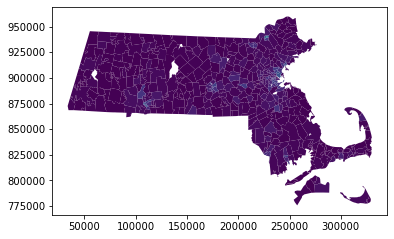

In [85]:
#Plotting limited_eng column 
zcta.plot('percent_limited')

In [86]:
#Checking to ensure zcta and foreign can be merged
print(zcta.ZCTA5CE10.unique()[:10])
print(foreign.ZCTA.unique()[:10])


['02536' '02556' '02540' '02646' '01237' '01259' '01242' '01253' '01264'
 '01270']
['01001' '01002' '01003' '01005' '01007' '01008' '01009' '01010' '01011'
 '01012']


In [87]:
#Merging zcta and foreign 
zcta = zcta.merge(foreign,left_on='ZCTA5CE10', right_on='ZCTA')

In [88]:
#Checking columns in zcta to ensure that merge happened
zcta.columns

Index(['STATEFP10', 'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry', 'Euclidean Distances', 'hosp_reclass',
       'ZCTA_x', 'Total Occupied Units', '$25,000-$34,999', '$20,000-$24,999',
       '$15,000-$19,999', '$10,000-$14,999', '$5,000-$9,999',
       'Less Than $5,000', 'low-income', 'percent_low-income', 'ZCTA_y',
       'Total Population_x', '65-69 Years', '70-74 Years', '75-79 Years',
       '80-84 Years', '85 Years and Older', 'seniors', 'percent_seniors',
       'ZCTA_x', 'Total Households', 'Limited English-Speaking',
       'percent_limited', 'ZCTA_y', 'Total Population_y',
       'Foreign-Born Total Pop', 'percent_foreign'],
      dtype='object')

<AxesSubplot:>

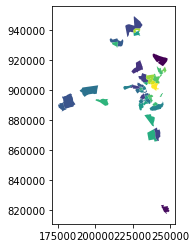

In [89]:
#Plotting foreign column 
zcta.plot('percent_foreign')

# Question 3(2)
**Summarize the indicator values (like population density) for each ZCTA in the study area.**

In [90]:
#Checking descriptive statistics for the percent_seniors column 
zcta['percent_seniors'].describe() #do this for each column 



count    534.000000
mean       0.196265
std        0.113496
min        0.000000
25%        0.141542
50%        0.173196
75%        0.216464
max        1.000000
Name: percent_seniors, dtype: float64

In [91]:
#Sorting zcta by percent_seniors
zcta.sort_values(by='percent_seniors', ascending = False)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,seniors,percent_seniors,ZCTA_x,Total Households,Limited English-Speaking,percent_limited,ZCTA_y,Total Population_y,Foreign-Born Total Pop,percent_foreign
480,25,02553,2502553,B5,G6350,S,636142,1769252,+41.7125165,-070.6207578,...,111,1.000000,02553,111,0,0.000000,02553,0.0,0.0,NaN
224,25,01066,2501066,B5,G6350,S,1839260,121053,+42.4069028,-072.6550180,...,31,1.000000,01066,31,0,0.000000,01066,0.0,0.0,NaN
470,25,02203,2502203,B5,G6350,S,80317,0,+42.3605978,-071.0587753,...,30,1.000000,02203,30,0,0.000000,02203,0.0,0.0,NaN
66,25,02663,2502663,B5,G6350,S,3658101,2870102,+41.8944436,-070.0121798,...,85,0.833333,02663,64,0,0.000000,02663,0.0,0.0,NaN
406,25,02669,2502669,B5,G6350,S,2314379,510177,+41.6666462,-069.9897017,...,19,0.703704,02669,19,0,0.000000,02669,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,25,02651,2502651,B5,G6350,S,181584,0,+41.8749849,-070.0034925,...,0,0.000000,02651,8,0,0.000000,02651,0.0,0.0,NaN
186,25,02163,2502163,B5,G6350,S,256727,32165,+42.3661684,-071.1228503,...,0,0.000000,02163,506,22,0.043478,02163,0.0,0.0,NaN
378,25,02584,2502584,B5,G6350,S,193854,0,+41.2586880,-070.0071419,...,0,NaN,02584,0,0,NaN,02584,0.0,0.0,NaN
484,25,02643,2502643,B5,G6350,S,4904568,4657785,+41.7977769,-069.9373266,...,0,NaN,02643,0,0,NaN,02643,0.0,0.0,NaN


In [92]:
#Checking descriptive statistics for the percent_seniors column 
zcta['Euclidean Distances'].describe() 


count      537.000000
mean      9070.788162
std       6972.600593
min        216.309217
25%       3945.080820
50%       7679.587668
75%      11908.336673
max      45410.688562
Name: Euclidean Distances, dtype: float64

In [93]:
#Sorting zcta by Euclidean Distances
zcta.sort_values(by='Euclidean Distances', ascending = False)


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,seniors,percent_seniors,ZCTA_x,Total Households,Limited English-Speaking,percent_limited,ZCTA_y,Total Population_y,Foreign-Born Total Pop,percent_foreign
134,25,02652,2502652,B5,G6350,S,20714250,6477901,+42.0495370,-070.0949889,...,238,0.346434,02652,338,0,0.000000,02652,0.0,0.0,NaN
135,25,02666,2502666,B5,G6350,S,32944245,4790983,+41.9907790,-070.0457213,...,193,0.443678,02666,263,20,0.076046,02666,0.0,0.0,NaN
200,25,02657,2502657,B5,G6350,S,25047886,12766243,+42.0598291,-070.2004073,...,821,0.276152,02657,1702,43,0.025264,02657,0.0,0.0,NaN
260,25,02667,2502667,B5,G6350,S,48249844,16144940,+41.9219965,-070.0233560,...,1094,0.311238,02667,1534,12,0.007823,02667,0.0,0.0,NaN
66,25,02663,2502663,B5,G6350,S,3658101,2870102,+41.8944436,-070.0121798,...,85,0.833333,02663,64,0,0.000000,02663,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,25,02108,2502108,B5,G6350,S,354836,0,+42.3577670,-071.0648484,...,718,0.161203,02108,2091,0,0.000000,02108,0.0,0.0,NaN
53,25,02118,2502118,B5,G6350,S,2850698,15328,+42.3378600,-071.0698052,...,3327,0.117720,02118,13193,1693,0.128326,02118,0.0,0.0,NaN
390,25,02111,2502111,B5,G6350,S,669967,56933,+42.3505177,-071.0590623,...,1096,0.138279,02111,3452,1062,0.307648,02111,0.0,0.0,NaN
317,25,02114,2502114,B5,G6350,S,1164209,303495,+42.3631745,-071.0686463,...,1718,0.128834,02114,7499,342,0.045606,02114,0.0,0.0,NaN


In [94]:
#Checking descriptive statistics for the percent_low-income column 
zcta['percent_low-income'].describe()


count    530.000000
mean       0.197825
std        0.122357
min        0.000000
25%        0.126053
50%        0.174483
75%        0.238271
max        1.000000
Name: percent_low-income, dtype: float64

In [95]:
#Sorting zcta by percent_low-income
zcta.sort_values(by='percent_low-income', ascending = False)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,seniors,percent_seniors,ZCTA_x,Total Households,Limited English-Speaking,percent_limited,ZCTA_y,Total Population_y,Foreign-Born Total Pop,percent_foreign
224,25,01066,2501066,B5,G6350,S,1839260,121053,+42.4069028,-072.6550180,...,31,1.000000,01066,31,0,0.0,01066,0.0,0.0,NaN
114,25,02457,2502457,B5,G6350,S,413241,0,+42.2993878,-071.2742420,...,0,0.000000,02457,8,8,1.0,02457,0.0,0.0,NaN
470,25,02203,2502203,B5,G6350,S,80317,0,+42.3605978,-071.0587753,...,30,1.000000,02203,30,0,0.0,02203,0.0,0.0,NaN
160,25,01003,2501003,B5,G6350,S,1842384,12788,+42.3899407,-072.5241081,...,4,0.000352,01003,42,0,0.0,01003,0.0,0.0,NaN
34,25,01097,2501097,B5,G6350,S,4426154,208868,+42.1780378,-072.8326115,...,3,0.053571,01097,20,0,0.0,01097,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,25,01086,2501086,B5,G6350,S,96152,0,+42.1304462,-072.7939672,...,0,0.000000,01086,0,0,NaN,01086,0.0,0.0,NaN
378,25,02584,2502584,B5,G6350,S,193854,0,+41.2586880,-070.0071419,...,0,NaN,02584,0,0,NaN,02584,0.0,0.0,NaN
484,25,02643,2502643,B5,G6350,S,4904568,4657785,+41.7977769,-069.9373266,...,0,NaN,02643,0,0,NaN,02643,0.0,0.0,NaN
505,25,01199,2501199,B5,G6350,S,28277,0,+42.1205631,-072.6044677,...,0,NaN,01199,0,0,NaN,01199,0.0,0.0,NaN


In [96]:
#Checking descriptive statistics for the percent_limited column 
zcta['percent_limited'].describe() 

count    530.000000
mean       0.034931
std        0.070152
min        0.000000
25%        0.000000
50%        0.012260
75%        0.037206
max        1.000000
Name: percent_limited, dtype: float64

In [97]:
#Sorting zcta by percent_limited
zcta.sort_values(by='percent_limited', ascending = False)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,seniors,percent_seniors,ZCTA_x,Total Households,Limited English-Speaking,percent_limited,ZCTA_y,Total Population_y,Foreign-Born Total Pop,percent_foreign
114,25,02457,2502457,B5,G6350,S,413241,0,+42.2993878,-071.2742420,...,0,0.000000,02457,8,8,1.000000,02457,0.0,0.0,NaN
148,25,01840,2501840,B5,G6350,S,1290418,200628,+42.7067633,-071.1604026,...,758,0.136013,01840,2265,1047,0.462252,01840,0.0,0.0,NaN
149,25,01901,2501901,B5,G6350,S,641320,68753,+42.4607111,-070.9460730,...,465,0.217799,01901,1017,458,0.450344,01901,0.0,0.0,NaN
390,25,02111,2502111,B5,G6350,S,669967,56933,+42.3505177,-071.0590623,...,1096,0.138279,02111,3452,1062,0.307648,02111,0.0,0.0,NaN
16,25,01841,2501841,B5,G6350,S,8000223,462412,+42.7120153,-071.1648727,...,4839,0.098021,01841,15149,4575,0.302000,01841,49367.0,21402.0,0.433528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,25,01086,2501086,B5,G6350,S,96152,0,+42.1304462,-072.7939672,...,0,0.000000,01086,0,0,NaN,01086,0.0,0.0,NaN
378,25,02584,2502584,B5,G6350,S,193854,0,+41.2586880,-070.0071419,...,0,NaN,02584,0,0,NaN,02584,0.0,0.0,NaN
484,25,02643,2502643,B5,G6350,S,4904568,4657785,+41.7977769,-069.9373266,...,0,NaN,02643,0,0,NaN,02643,0.0,0.0,NaN
505,25,01199,2501199,B5,G6350,S,28277,0,+42.1205631,-072.6044677,...,0,NaN,01199,0,0,NaN,01199,0.0,0.0,NaN


In [98]:
#Checking descriptive statistics for the percent_foreign column 
zcta['percent_foreign'].describe() 

count    44.000000
mean      0.310834
std       0.079671
min       0.154728
25%       0.246037
50%       0.302098
75%       0.368387
max       0.474473
Name: percent_foreign, dtype: float64

In [99]:
#Sorting zcta by percent_foreign
zcta.sort_values(by='percent_foreign', ascending = False)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,seniors,percent_seniors,ZCTA_x,Total Households,Limited English-Speaking,percent_limited,ZCTA_y,Total Population_y,Foreign-Born Total Pop,percent_foreign
526,25,02128,2502128,B5,G6350,S,12561059,2952872,+42.3611289,-071.0069754,...,4270,0.090346,02128,16565,4254,0.256807,02128,47263.0,22425.0,0.474473
320,25,02150,2502150,B5,G6350,S,5718794,638247,+42.3968243,-071.0313479,...,3785,0.094665,02150,13259,3176,0.239535,02150,39983.0,18134.0,0.453543
16,25,01841,2501841,B5,G6350,S,8000223,462412,+42.7120153,-071.1648727,...,4839,0.098021,01841,15149,4575,0.302000,01841,49367.0,21402.0,0.433528
107,25,02149,2502149,B5,G6350,S,8873256,630370,+42.4059375,-071.0546487,...,5153,0.111735,02149,16021,2792,0.174271,02149,46118.0,19867.0,0.430786
452,25,02148,2502148,B5,G6350,S,13063769,99890,+42.4301399,-071.0576939,...,7760,0.127246,02148,23025,3982,0.172942,02148,60984.0,26005.0,0.426423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,25,01537,2501537,B5,G6350,S,18085937,295745,+42.1589660,-071.8970514,...,338,0.153567,01537,941,22,0.023379,01537,0.0,0.0,NaN
533,25,01503,2501503,B5,G6350,S,33598202,523984,+42.3849290,-071.6338895,...,811,0.254871,01503,1179,13,0.011026,01503,0.0,0.0,NaN
534,25,01452,2501452,B5,G6350,S,106373488,2406515,+42.4895983,-072.0028783,...,878,0.186491,01452,1697,11,0.006482,01452,0.0,0.0,NaN
535,25,01571,2501571,B5,G6350,S,53915863,2717076,+42.0537777,-071.9350751,...,1690,0.144161,01571,3905,69,0.017670,01571,0.0,0.0,NaN


# Question 3(3)
**Produce a choropleth map visualizing the indicator values and produce a ZCTA ranking based on the indicator values, reporting the highest and lowest ranking ZCTAs.**

In [100]:
#Checking the crs of the zcta file
zcta.crs

<Projected CRS: EPSG:6491>
Name: NAD83(2011) / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

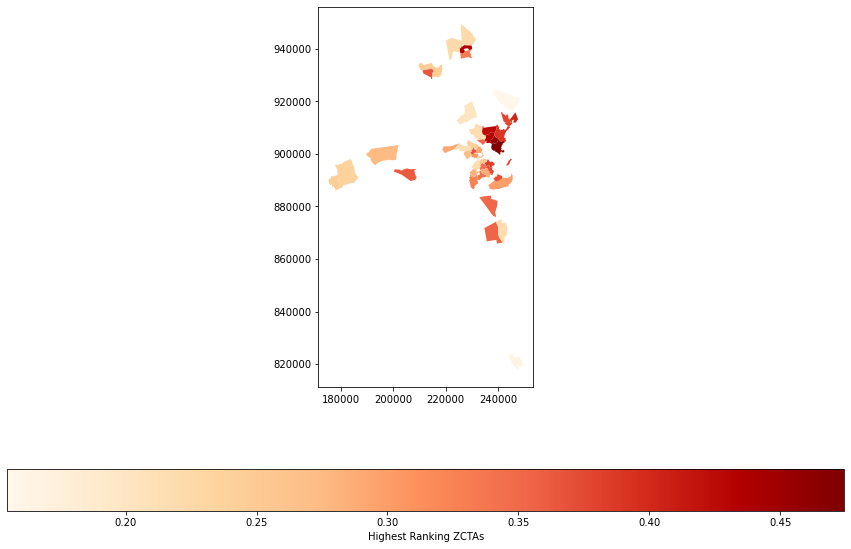

In [101]:
#Visualising percent_foreign
import matplotlib.pyplot as plt
zcta.plot(column='percent_foreign',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Highest Ranking ZCTAs", 'orientation': "horizontal"})

<AxesSubplot:>

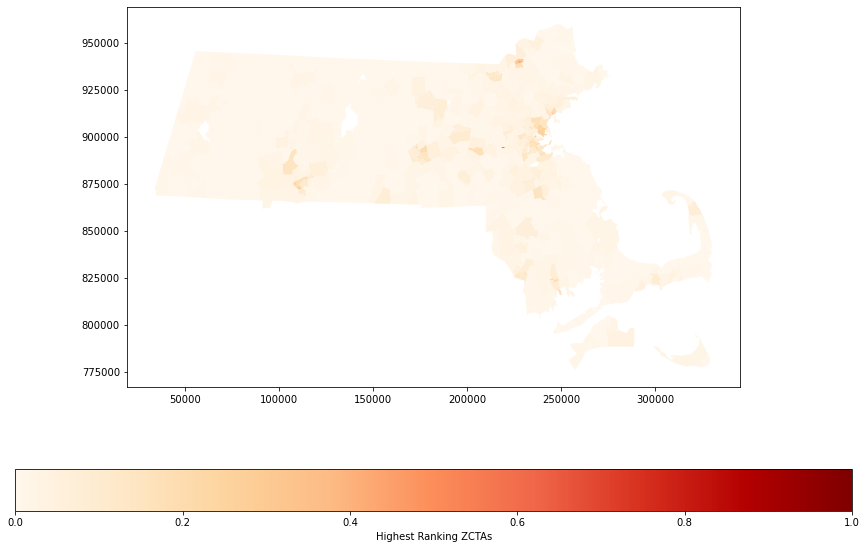

In [102]:
#Visualising percent_limited
zcta.plot(column='percent_limited',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Highest Ranking ZCTAs", 'orientation': "horizontal"})

<AxesSubplot:>

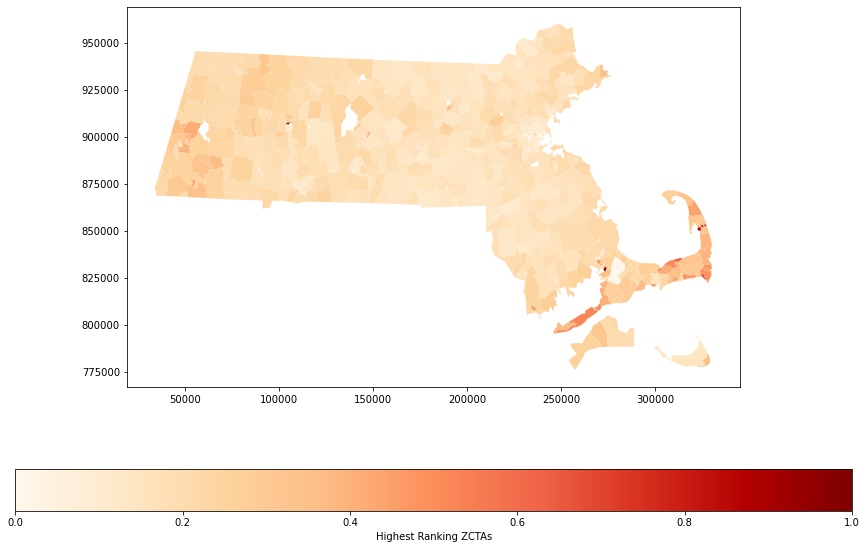

In [103]:
#Visualising percent_seniors
zcta.plot(column='percent_seniors',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Highest Ranking ZCTAs", 'orientation': "horizontal"})

<AxesSubplot:>

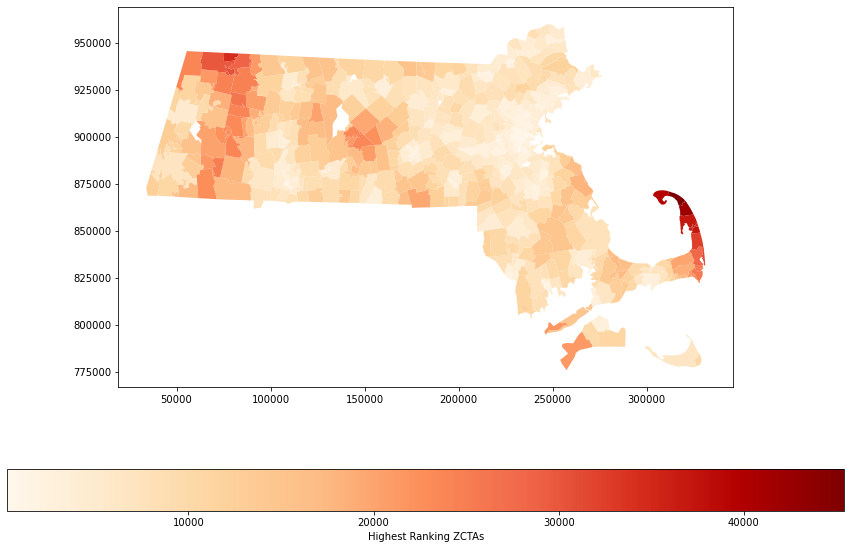

In [104]:
#Visualising Euclidean Distances
zcta.plot(column='Euclidean Distances',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "Highest Ranking ZCTAs", 'orientation': "horizontal"})

<AxesSubplot:>

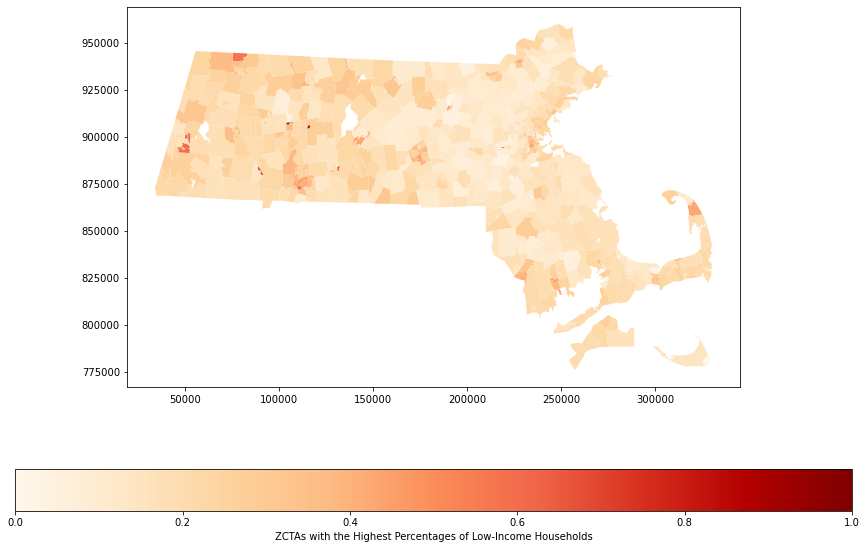

In [105]:
#Visualising percent_low-income
zcta.plot(column='percent_low-income',
           legend=True,
           cmap='OrRd',
           figsize=(15, 10),
           legend_kwds={'label': "ZCTAs with the Highest Percentages of Low-Income Households", 'orientation': "horizontal"})

# Question 3(4)
**Convert the indicator values into a suitability or vulnerability index or score. This can be done in two ways:
- Reclassify the indicator values based on classes of your choice into a five-point (or ten-point) score.
- Normalize the indicator values into a suitability or vulnerability index ranging from zero to one.**

In [106]:
#Normalising the data 
def normalise_series(series):
    series = (series- series.min()) / (series.max()-series.min())
    return series

In [107]:
#Normalising the percent_seniors column 
zcta['seniors_norm'] = zcta['normalise']=normalise_series(zcta['percent_seniors'])

In [108]:
#Checking the column to make sure it was normalised
zcta.describe()

,ALAND10,AWATER10,Euclidean Distances,hosp_reclass,Total Occupied Units,"$25,000-$34,999","$20,000-$24,999","$15,000-$19,999","$10,000-$14,999","$5,000-$9,999",...,seniors,percent_seniors,Total Households,Limited English-Speaking,percent_limited,Total Population_y,Foreign-Born Total Pop,percent_foreign,seniors_norm,normalise
count,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,534.000000,537.000000,537.000000,530.000000,537.000000,537.000000,44.000000,534.000000,534.000000
mean,3.738831e+07,2.549394e+06,9070.788162,1.283054,4874.262570,326.119181,169.713222,179.713222,205.623836,122.458101,...,2061.571695,0.196265,4874.262570,284.627561,0.034931,3180.055866,987.646182,0.310834,0.196265,0.196265
std,3.673130e+07,5.769443e+06,6972.600593,1.296505,4913.064547,394.174085,206.867350,240.788389,301.976073,202.658393,...,1975.837584,0.113496,4913.064547,605.435478,0.070152,11117.719484,3610.249545,0.079671,0.113496,0.113496
min,2.827700e+04,0.000000e+00,216.309217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154728,0.000000,0.000000
25%,8.946607e+06,2.926910e+05,3945.080820,0.000000,1068.000000,54.000000,23.000000,21.000000,21.000000,10.000000,...,518.000000,0.141542,1068.000000,0.000000,0.000000,0.000000,0.000000,0.246037,0.141542,0.141542
50%,2.848264e+07,1.038205e+06,7679.587668,1.000000,3430.000000,184.000000,91.000000,80.000000,75.000000,45.000000,...,1510.000000,0.173196,3430.000000,43.000000,0.012260,0.000000,0.000000,0.302098,0.173196,0.173196
75%,5.371253e+07,2.593185e+06,11908.336673,2.000000,7215.000000,440.000000,227.000000,236.000000,263.000000,131.000000,...,3137.000000,0.216464,7215.000000,235.000000,0.037206,0.000000,0.000000,0.368387,0.216464,0.216464
max,2.473689e+08,6.586522e+07,45410.688562,5.000000,25468.000000,2228.000000,1020.000000,1375.000000,1741.000000,1389.000000,...,13074.000000,1.000000,25468.000000,4575.000000,1.000000,63420.000000,26005.000000,0.474473,1.000000,1.000000


In [109]:
#Normalising the Euclidean Distances column 
zcta['edistances_norm'] = zcta['normalise']=normalise_series(zcta['Euclidean Distances'])

In [110]:
#Checking the column to make sure it was normalised
zcta.describe()

,ALAND10,AWATER10,Euclidean Distances,hosp_reclass,Total Occupied Units,"$25,000-$34,999","$20,000-$24,999","$15,000-$19,999","$10,000-$14,999","$5,000-$9,999",...,percent_seniors,Total Households,Limited English-Speaking,percent_limited,Total Population_y,Foreign-Born Total Pop,percent_foreign,seniors_norm,normalise,edistances_norm
count,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,534.000000,537.000000,537.000000,530.000000,537.000000,537.000000,44.000000,534.000000,537.000000,537.000000
mean,3.738831e+07,2.549394e+06,9070.788162,1.283054,4874.262570,326.119181,169.713222,179.713222,205.623836,122.458101,...,0.196265,4874.262570,284.627561,0.034931,3180.055866,987.646182,0.310834,0.196265,0.195920,0.195920
std,3.673130e+07,5.769443e+06,6972.600593,1.296505,4913.064547,394.174085,206.867350,240.788389,301.976073,202.658393,...,0.113496,4913.064547,605.435478,0.070152,11117.719484,3610.249545,0.079671,0.113496,0.154280,0.154280
min,2.827700e+04,0.000000e+00,216.309217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154728,0.000000,0.000000,0.000000
25%,8.946607e+06,2.926910e+05,3945.080820,0.000000,1068.000000,54.000000,23.000000,21.000000,21.000000,10.000000,...,0.141542,1068.000000,0.000000,0.000000,0.000000,0.000000,0.246037,0.141542,0.082505,0.082505
50%,2.848264e+07,1.038205e+06,7679.587668,1.000000,3430.000000,184.000000,91.000000,80.000000,75.000000,45.000000,...,0.173196,3430.000000,43.000000,0.012260,0.000000,0.000000,0.302098,0.173196,0.165137,0.165137
75%,5.371253e+07,2.593185e+06,11908.336673,2.000000,7215.000000,440.000000,227.000000,236.000000,263.000000,131.000000,...,0.216464,7215.000000,235.000000,0.037206,0.000000,0.000000,0.368387,0.216464,0.258705,0.258705
max,2.473689e+08,6.586522e+07,45410.688562,5.000000,25468.000000,2228.000000,1020.000000,1375.000000,1741.000000,1389.000000,...,1.000000,25468.000000,4575.000000,1.000000,63420.000000,26005.000000,0.474473,1.000000,1.000000,1.000000


In [111]:
#Normalising the percent_limited column 
zcta['limited_norm'] = zcta['normalise']=normalise_series(zcta['percent_limited'])

In [112]:
#Checking the column to make sure it was normalised
zcta.describe()

,ALAND10,AWATER10,Euclidean Distances,hosp_reclass,Total Occupied Units,"$25,000-$34,999","$20,000-$24,999","$15,000-$19,999","$10,000-$14,999","$5,000-$9,999",...,Total Households,Limited English-Speaking,percent_limited,Total Population_y,Foreign-Born Total Pop,percent_foreign,seniors_norm,normalise,edistances_norm,limited_norm
count,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,537.000000,530.000000,537.000000,537.000000,44.000000,534.000000,530.000000,537.000000,530.000000
mean,3.738831e+07,2.549394e+06,9070.788162,1.283054,4874.262570,326.119181,169.713222,179.713222,205.623836,122.458101,...,4874.262570,284.627561,0.034931,3180.055866,987.646182,0.310834,0.196265,0.034931,0.195920,0.034931
std,3.673130e+07,5.769443e+06,6972.600593,1.296505,4913.064547,394.174085,206.867350,240.788389,301.976073,202.658393,...,4913.064547,605.435478,0.070152,11117.719484,3610.249545,0.079671,0.113496,0.070152,0.154280,0.070152
min,2.827700e+04,0.000000e+00,216.309217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.154728,0.000000,0.000000,0.000000,0.000000
25%,8.946607e+06,2.926910e+05,3945.080820,0.000000,1068.000000,54.000000,23.000000,21.000000,21.000000,10.000000,...,1068.000000,0.000000,0.000000,0.000000,0.000000,0.246037,0.141542,0.000000,0.082505,0.000000
50%,2.848264e+07,1.038205e+06,7679.587668,1.000000,3430.000000,184.000000,91.000000,80.000000,75.000000,45.000000,...,3430.000000,43.000000,0.012260,0.000000,0.000000,0.302098,0.173196,0.012260,0.165137,0.012260
75%,5.371253e+07,2.593185e+06,11908.336673,2.000000,7215.000000,440.000000,227.000000,236.000000,263.000000,131.000000,...,7215.000000,235.000000,0.037206,0.000000,0.000000,0.368387,0.216464,0.037206,0.258705,0.037206
max,2.473689e+08,6.586522e+07,45410.688562,5.000000,25468.000000,2228.000000,1020.000000,1375.000000,1741.000000,1389.000000,...,25468.000000,4575.000000,1.000000,63420.000000,26005.000000,0.474473,1.000000,1.000000,1.000000,1.000000


In [113]:
#Normalising the percent_low-income column 
zcta['financial_norm'] = zcta['normalise']=normalise_series(zcta['percent_low-income'])

In [114]:
#Checking the column to make sure it was normalised
zcta.describe()

,ALAND10,AWATER10,Euclidean Distances,hosp_reclass,Total Occupied Units,"$25,000-$34,999","$20,000-$24,999","$15,000-$19,999","$10,000-$14,999","$5,000-$9,999",...,Limited English-Speaking,percent_limited,Total Population_y,Foreign-Born Total Pop,percent_foreign,seniors_norm,normalise,edistances_norm,limited_norm,financial_norm
count,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,537.000000,530.000000,537.000000,537.000000,44.000000,534.000000,530.000000,537.000000,530.000000,530.000000
mean,3.738831e+07,2.549394e+06,9070.788162,1.283054,4874.262570,326.119181,169.713222,179.713222,205.623836,122.458101,...,284.627561,0.034931,3180.055866,987.646182,0.310834,0.196265,0.197825,0.195920,0.034931,0.197825
std,3.673130e+07,5.769443e+06,6972.600593,1.296505,4913.064547,394.174085,206.867350,240.788389,301.976073,202.658393,...,605.435478,0.070152,11117.719484,3610.249545,0.079671,0.113496,0.122357,0.154280,0.070152,0.122357
min,2.827700e+04,0.000000e+00,216.309217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.154728,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.946607e+06,2.926910e+05,3945.080820,0.000000,1068.000000,54.000000,23.000000,21.000000,21.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.246037,0.141542,0.126053,0.082505,0.000000,0.126053
50%,2.848264e+07,1.038205e+06,7679.587668,1.000000,3430.000000,184.000000,91.000000,80.000000,75.000000,45.000000,...,43.000000,0.012260,0.000000,0.000000,0.302098,0.173196,0.174483,0.165137,0.012260,0.174483
75%,5.371253e+07,2.593185e+06,11908.336673,2.000000,7215.000000,440.000000,227.000000,236.000000,263.000000,131.000000,...,235.000000,0.037206,0.000000,0.000000,0.368387,0.216464,0.238271,0.258705,0.037206,0.238271
max,2.473689e+08,6.586522e+07,45410.688562,5.000000,25468.000000,2228.000000,1020.000000,1375.000000,1741.000000,1389.000000,...,4575.000000,1.000000,63420.000000,26005.000000,0.474473,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
#Normalising the percent_foreign column 
zcta['foreign_norm'] = zcta['normalise']=normalise_series(zcta['percent_foreign'])

In [116]:
#Checking the column to make sure it was normalised
zcta.describe()

,ALAND10,AWATER10,Euclidean Distances,hosp_reclass,Total Occupied Units,"$25,000-$34,999","$20,000-$24,999","$15,000-$19,999","$10,000-$14,999","$5,000-$9,999",...,percent_limited,Total Population_y,Foreign-Born Total Pop,percent_foreign,seniors_norm,normalise,edistances_norm,limited_norm,financial_norm,foreign_norm
count,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,...,530.000000,537.000000,537.000000,44.000000,534.000000,44.000000,537.000000,530.000000,530.000000,44.000000
mean,3.738831e+07,2.549394e+06,9070.788162,1.283054,4874.262570,326.119181,169.713222,179.713222,205.623836,122.458101,...,0.034931,3180.055866,987.646182,0.310834,0.196265,0.488222,0.195920,0.034931,0.197825,0.488222
std,3.673130e+07,5.769443e+06,6972.600593,1.296505,4913.064547,394.174085,206.867350,240.788389,301.976073,202.658393,...,0.070152,11117.719484,3610.249545,0.079671,0.113496,0.249172,0.154280,0.070152,0.122357,0.249172
min,2.827700e+04,0.000000e+00,216.309217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.154728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.946607e+06,2.926910e+05,3945.080820,0.000000,1068.000000,54.000000,23.000000,21.000000,21.000000,10.000000,...,0.000000,0.000000,0.000000,0.246037,0.141542,0.285570,0.082505,0.000000,0.126053,0.285570
50%,2.848264e+07,1.038205e+06,7679.587668,1.000000,3430.000000,184.000000,91.000000,80.000000,75.000000,45.000000,...,0.012260,0.000000,0.000000,0.302098,0.173196,0.460899,0.165137,0.012260,0.174483,0.460899
75%,5.371253e+07,2.593185e+06,11908.336673,2.000000,7215.000000,440.000000,227.000000,236.000000,263.000000,131.000000,...,0.037206,0.000000,0.000000,0.368387,0.216464,0.668218,0.258705,0.037206,0.238271,0.668218
max,2.473689e+08,6.586522e+07,45410.688562,5.000000,25468.000000,2228.000000,1020.000000,1375.000000,1741.000000,1389.000000,...,1.000000,63420.000000,26005.000000,0.474473,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Question 4
**Summarize the single indicator based scores or indices into an overall weighted or unweighted score or index. You should justify any chosen weights or the decision to forego weighting the indicators (assigning each indicator an equal weight). You are welcome to produce both a weighted and an unweighted overall index or score.**

In [117]:
#Adding the unweighted scores for each indicator
zcta['unweighted_score'] = zcta['financial_norm'] + zcta['foreign_norm'] + zcta['limited_norm'] + zcta['edistances_norm'] + zcta['seniors_norm']

In [118]:
#Checking the maximum score to ensure that calculations were done correctly
zcta['unweighted_score'].max()

1.6699491259567407

# Question 5
**Visualize the overall suitability or vulnerability index or score on a choropleth map and produce a ZCTA ranking based on the score or index, reporting the highest and lowest ranking ZCTAs.**

In [119]:
#Sorting the values based on unweighted score
zcta = zcta.sort_values(by='unweighted_score', ascending = False)
zcta

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,Total Population_y,Foreign-Born Total Pop,percent_foreign,seniors_norm,normalise,edistances_norm,limited_norm,financial_norm,foreign_norm,unweighted_score
526,25,02128,2502128,B5,G6350,S,12561059,2952872,+42.3611289,-071.0069754,...,47263.0,22425.0,0.474473,0.090346,1.000000,0.080298,0.256807,0.242499,1.000000,1.669949
16,25,01841,2501841,B5,G6350,S,8000223,462412,+42.7120153,-071.1648727,...,49367.0,21402.0,0.433528,0.098021,0.871947,0.031374,0.302000,0.357911,0.871947,1.661254
320,25,02150,2502150,B5,G6350,S,5718794,638247,+42.3968243,-071.0313479,...,39983.0,18134.0,0.453543,0.094665,0.934542,0.035348,0.239535,0.300173,0.934542,1.604264
427,25,01902,2501902,B5,G6350,S,6223889,235638,+42.4710392,-070.9415353,...,49641.0,20040.0,0.403699,0.113958,0.778655,0.099377,0.200878,0.311677,0.778655,1.504545
452,25,02148,2502148,B5,G6350,S,13063769,99890,+42.4301399,-071.0576939,...,60984.0,26005.0,0.426423,0.127246,0.849726,0.053623,0.172942,0.262280,0.849726,1.465818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,25,01537,2501537,B5,G6350,S,18085937,295745,+42.1589660,-071.8970514,...,0.0,0.0,NaN,0.153567,NaN,0.295250,0.023379,0.221041,NaN,NaN
533,25,01503,2501503,B5,G6350,S,33598202,523984,+42.3849290,-071.6338895,...,0.0,0.0,NaN,0.254871,NaN,0.121982,0.011026,0.134012,NaN,NaN
534,25,01452,2501452,B5,G6350,S,106373488,2406515,+42.4895983,-072.0028783,...,0.0,0.0,NaN,0.186491,NaN,0.258705,0.006482,0.152622,NaN,NaN
535,25,01571,2501571,B5,G6350,S,53915863,2717076,+42.0537777,-071.9350751,...,0.0,0.0,NaN,0.144161,NaN,0.204321,0.017670,0.227401,NaN,NaN


<AxesSubplot:>

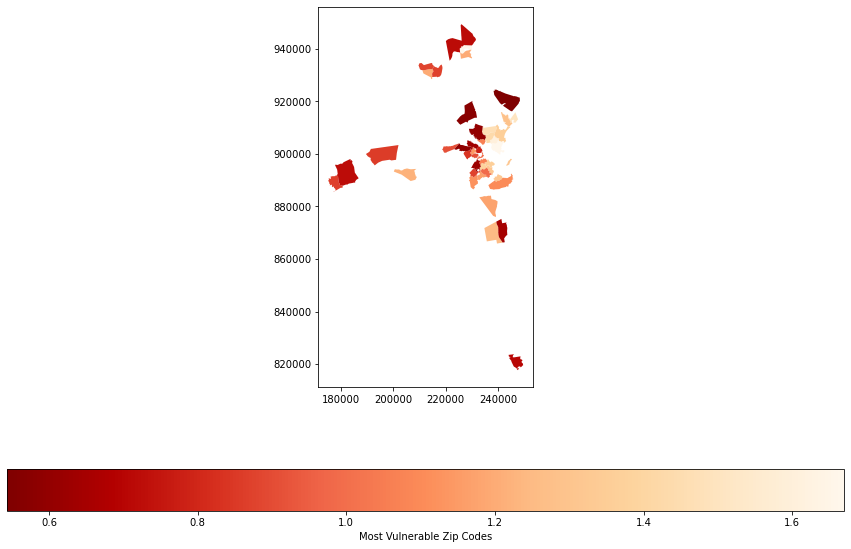

In [122]:
#plotting the values
import matplotlib.pyplot as plt
zcta.plot(column='unweighted_score',
           legend=True,
           cmap='OrRd_r',
           figsize=(15, 10),
           legend_kwds={'label': "Most Vulnerable Zip Codes", 'orientation': "horizontal"})

# What are the most and least vulnerable ZIP codes?

The most vulnerable ZIP code is 02128 and the least vulnerable zip code is 01468. 